Plotting Pareto Fronts...
____________________________________________________________


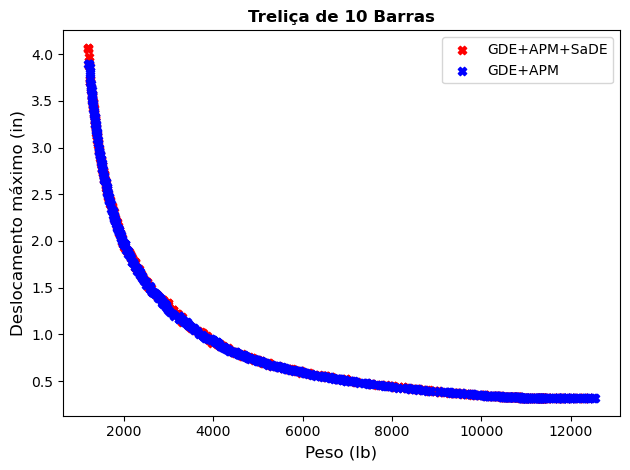

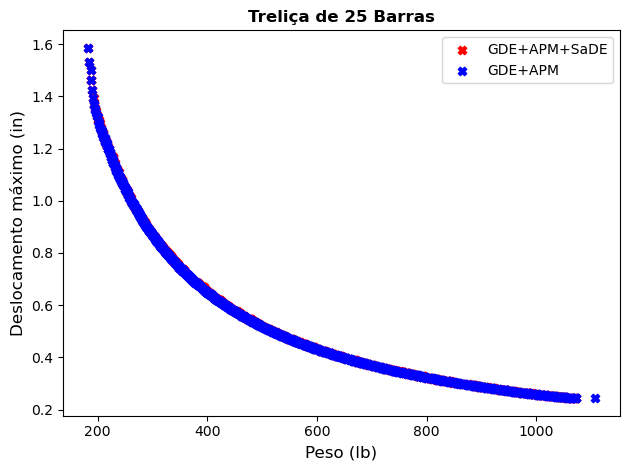

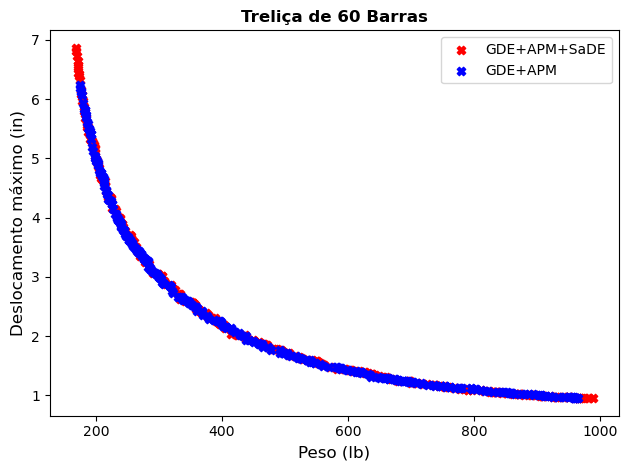

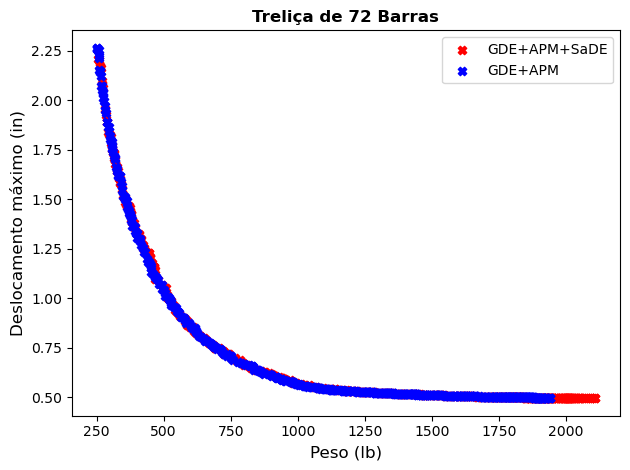

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_pareto_front(filename1, filename2, title):
    try:
        # Read results
        df1 = pd.read_csv(filename1)
        df2 = pd.read_csv(filename2)
        
        if len(df1) == 0 and len(df2) == 0:
            print(f"No solutions found in {filename1} or {filename2}")
            return
            
        # Separate feasible and infeasible solutions
        feasible1 = df1[df1['feasible'] == True]
        infeasible1 = df1[df1['feasible'] == False]
        
        feasible2 = df2[df2['feasible'] == True]
        infeasible2 = df2[df2['feasible'] == False]
        
        if len(infeasible1) == 0 and len(infeasible2) == 0:
            # Sort feasible solutions by weight for better visualization
            feasible_sorted1 = feasible1.sort_values('weight')
            feasible_sorted2 = feasible2.sort_values('weight')
            plt.scatter(feasible_sorted2['weight'], feasible_sorted2['max_displacement'], 
                       marker='X', c='red', label='GDE+APM+SaDE')
            plt.scatter(feasible_sorted1['weight'], feasible_sorted1['max_displacement'], 
                       marker='X', c='blue', label='GDE+APM')
        
        # if len(infeasible) > 0:
        #     plt.scatter(infeasible['weight'], infeasible['max_displacement'], 
        #                c='red', s=40, alpha=0.6, label='Inviáveis', marker='x')
        
        plt.xlabel('Peso (lb)', fontsize=12)
        plt.ylabel('Deslocamento máximo (in)', fontsize=12)
        plt.title(f'{title}', fontsize=12, fontweight='bold')
        plt.legend(fontsize=10)
        plt.grid(False)
        plt.tight_layout()
        
        # # Save the plot
        plot_filename = filename1.replace('.csv', '_plot.png')
        plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
        plt.show()
        
    except Exception as e:
        print(f"Error creating plot for {filename1} and {filename2}: {e}")


if __name__ == "__main__":
    print("Plotting Pareto Fronts...")
    print("_" * 60)
    
    # Define the files and titles
    files_and_titles = [
        ("./gde3_apm/pareto_front_10bar.csv", "./gde3_apm_SaDE/pareto_front_10bar_SaDE.csv", "Treliça de 10 Barras"),
        ("./gde3_apm/pareto_front_25bar.csv", "./gde3_apm_SaDE/pareto_front_25bar_SaDE.csv", "Treliça de 25 Barras"), 
        ("./gde3_apm/pareto_front_60bar.csv", "./gde3_apm_SaDE/pareto_front_60bar_SaDE.csv", "Treliça de 60 Barras"),
        ("./gde3_apm/pareto_front_72bar.csv", "./gde3_apm_SaDE/pareto_front_72bar_SaDE.csv", "Treliça de 72 Barras")
    ]
    
    # Plot individual Pareto fronts
    for filename1, filename2, title in files_and_titles:
        plot_pareto_front(filename1, filename2, title)